In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_image(images, title=None, labels=None, size=(4, 4), cmap='gray'):
    if not isinstance(images, list):
        images = [images]
 
    if not isinstance(labels, list):
        labels = []
 
    fig, axs = plt.subplots(1, len(images), figsize=size,  dpi=150)
 
    if title is not None:
        fig.suptitle(title, fontsize=16)
    need_titles = len(labels) == len(images)
    for i, image in enumerate(images):
        ax = axs[i] if len(images) > 1 else axs
 
        if need_titles:
            ax.set_title(labels[i])
        ax.imshow(image, cmap)
        ax.axis('off')

In [2]:
import cv2

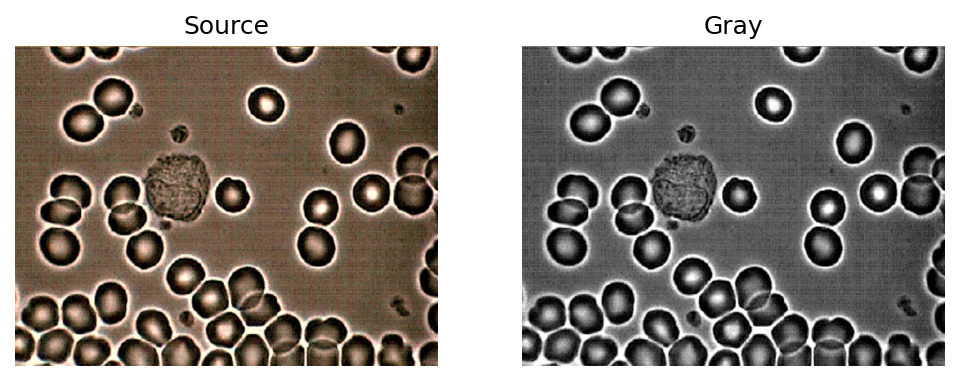

In [3]:
img = cv2.imread('./blood-cells.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image([img, gray], labels=['Source', 'Gray'], size=(8,8))

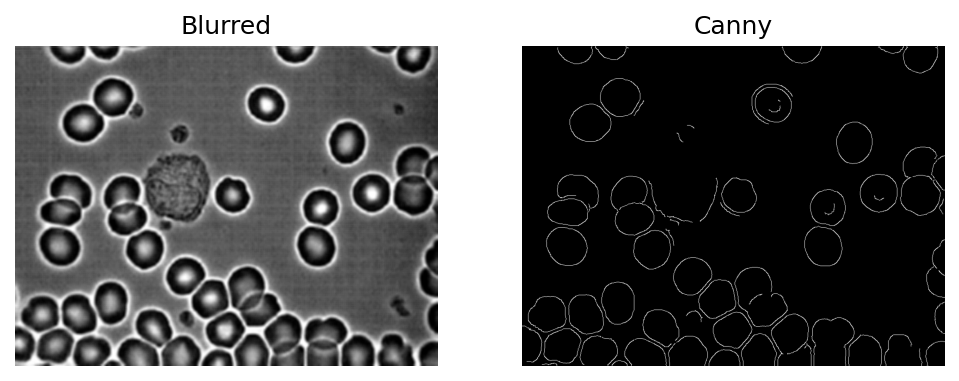

In [4]:
blurred = cv2.blur(gray, (7, 7))
canny = cv2.Canny(blurred, 130, 230)
plot_image([blurred, canny], labels=['Blurred', 'Canny'], size=(8,8))

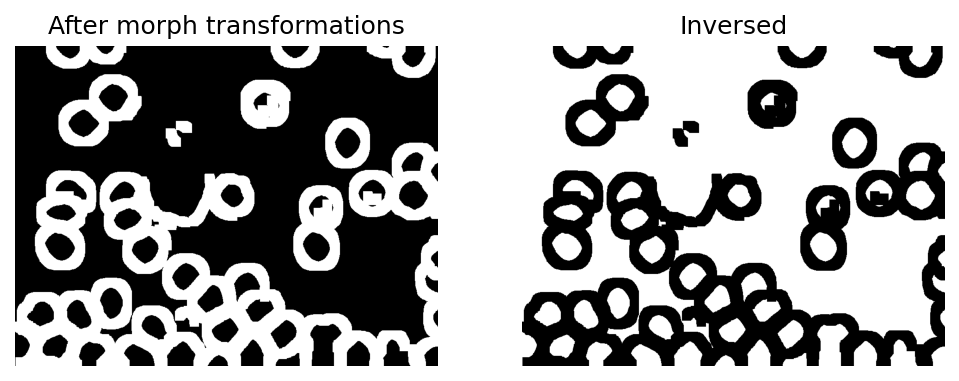

In [5]:
morph1 = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations=2)
morph2 = cv2.morphologyEx(morph1, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations=2)
morph3 = cv2.morphologyEx(morph2, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12)), iterations=1)

white = np.ones(morph3.shape, dtype='uint8')
inversed = cv2.subtract(white, morph3)

plot_image([morph3, inversed], labels=['After morph transformations', 'Inversed'], size=(8,8))

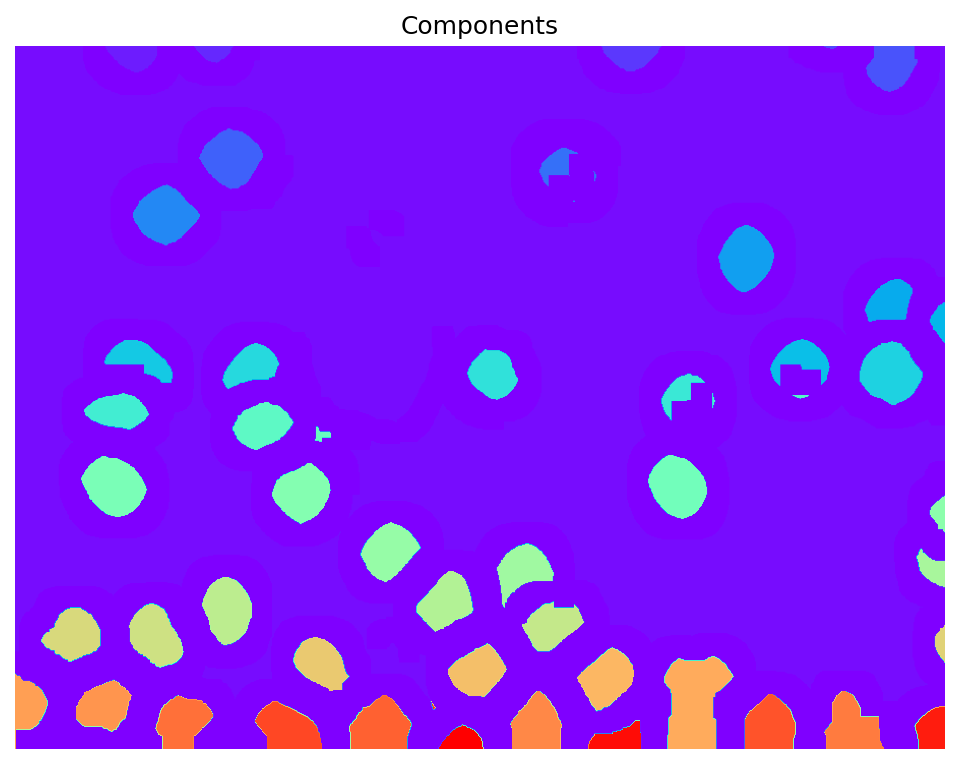

In [6]:
_, markers = cv2.connectedComponents(inversed)

plot_image([markers], labels=['Components'], size=(8,8), cmap='rainbow')

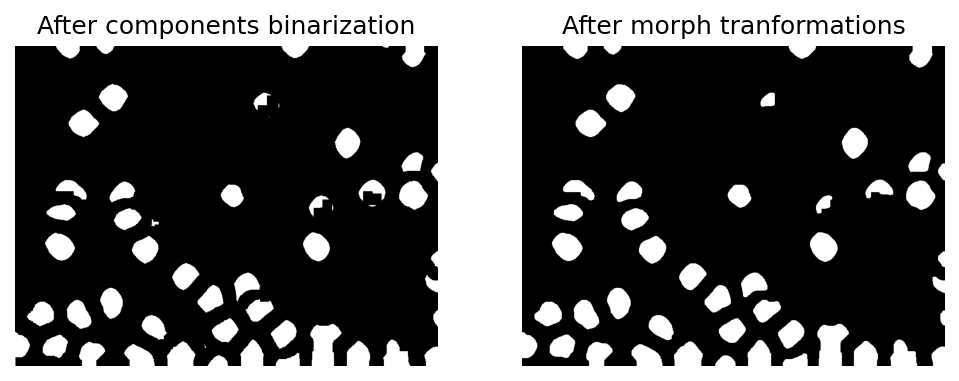

In [7]:
black = np.zeros(inversed.shape, dtype='uint8')
for numb in np.unique(markers):
    if numb > 1:
        black[markers == numb] = 255

# убираем совсем мелкие компоненты
erode = cv2.morphologyEx(black, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8)), iterations=1)

# наращиваем обратно
final = cv2.morphologyEx(erode, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)), iterations=1)

plot_image([black, final], labels=['After components binarization', 'After morph tranformations'], size=(8,8))

In [8]:
# считаем контуры
import imutils

t = cv2.findContours(final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Всего найдено клеток', len(imutils.grab_contours(t)))

Всего найдено клеток 46


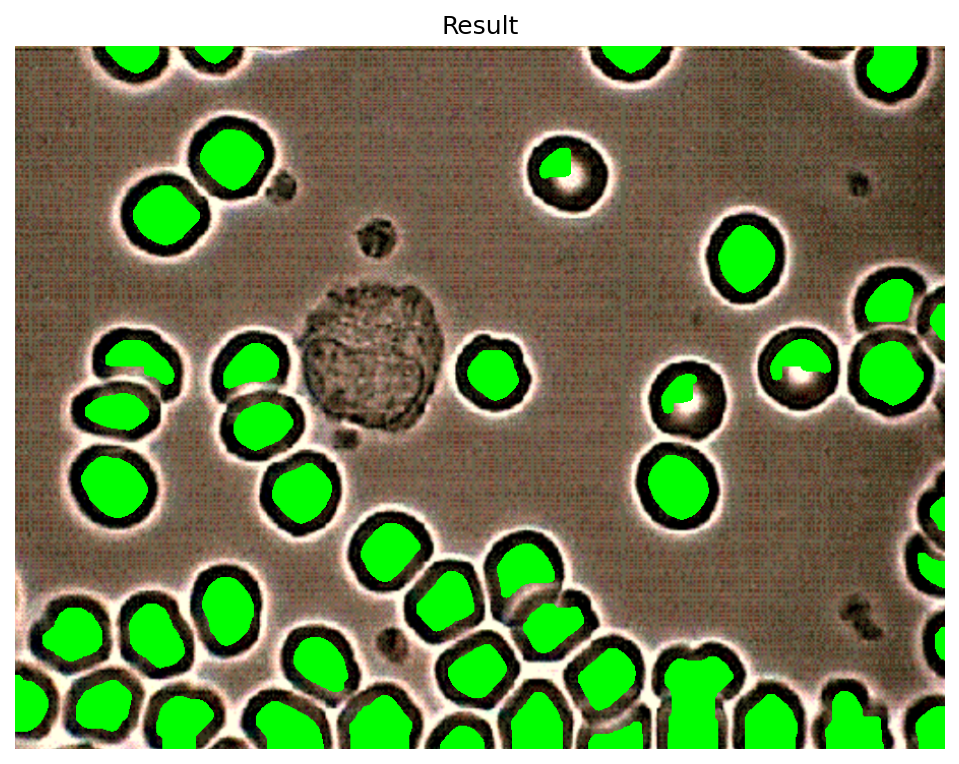

In [9]:
res = img.copy()
res[final==255] = [0, 255, 0]
plot_image([res], labels=['Result'], size=(8,8))